In [1]:
import pandas as pd
import numpy as np
# Data Engineering\Data\

In [2]:
df = pd.read_csv('D:\Repositorios\Practicas\Data Engineering\Data\winemag-data-130k-v2.csv')

In [3]:
df.shape

(129971, 14)

In [4]:
df.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'taster_name',
       'taster_twitter_handle', 'title', 'variety', 'winery'],
      dtype='object')

In [5]:
df.head

<bound method NDFrame.head of         Unnamed: 0      country  \
0                0        Italy   
1                1     Portugal   
2                2           US   
3                3           US   
4                4           US   
5                5        Spain   
6                6        Italy   
7                7       France   
8                8      Germany   
9                9       France   
10              10           US   
11              11       France   
12              12           US   
13              13        Italy   
14              14           US   
15              15      Germany   
16              16    Argentina   
17              17    Argentina   
18              18        Spain   
19              19           US   
20              20           US   
21              21           US   
22              22        Italy   
23              23           US   
24              24        Italy   
25              25           US   
26              26       

In [6]:
object_columns = df.columns[df.dtypes == object].tolist()

In [7]:
df[df.columns[df.dtypes != object]].dtypes

Unnamed: 0      int64
points          int64
price         float64
dtype: object

In [8]:
numeric_columns = df.columns[df.dtypes != object].tolist()

In [9]:
# Descripción del Pipeline a desarrollar

"""
Se pretende comparar precios de las diferentes variedades de vinos según el país de origen 
"""

'\nSe pretende comparar precios de las diferentes variedades de vinos según el país de origen \n'

In [10]:
df_filtered = df[['country', 'price', 'variety']]

In [11]:
df_filtered.shape

(129971, 3)

In [12]:
df_filtered.head

<bound method NDFrame.head of             country  price                   variety
0             Italy    NaN               White Blend
1          Portugal   15.0            Portuguese Red
2                US   14.0                Pinot Gris
3                US   13.0                  Riesling
4                US   65.0                Pinot Noir
5             Spain   15.0        Tempranillo-Merlot
6             Italy   16.0                  Frappato
7            France   24.0            Gewürztraminer
8           Germany   12.0            Gewürztraminer
9            France   27.0                Pinot Gris
10               US   19.0        Cabernet Sauvignon
11           France   30.0            Gewürztraminer
12               US   34.0        Cabernet Sauvignon
13            Italy    NaN         Nerello Mascalese
14               US   12.0                Chardonnay
15          Germany   24.0                  Riesling
16        Argentina   30.0                    Malbec
17        Argent

In [13]:
df_filtered.isnull().sum()

country      63
price      8996
variety       1
dtype: int64

In [14]:
df_filtered = df_filtered[df_filtered['country'].isnull() == False]

In [15]:
df_filtered.shape

(129908, 3)

In [16]:
df_filtered_groups = pd.DataFrame(df_filtered.country.groupby(df_filtered.variety).count())

In [17]:
df_filtered_2 = df_filtered.groupby(['country','variety']).agg({'price': ['count', 'mean']}).reset_index()

In [18]:
df_filtered_2['']

country                            variety price            
                                                   count        mean
0     Argentina                            Barbera     1   18.000000
1     Argentina                            Bonarda   105   16.628571
2     Argentina           Bordeaux-style Red Blend    86   41.546512
3     Argentina         Bordeaux-style White Blend     1   14.000000
4     Argentina                     Cabernet Blend     8   36.250000
5     Argentina                     Cabernet Franc    64   45.109375
6     Argentina  Cabernet Franc-Cabernet Sauvignon     3   40.666667
7     Argentina              Cabernet Franc-Malbec     4   58.500000
8     Argentina                 Cabernet Sauvignon   536   19.488806
9     Argentina  Cabernet Sauvignon-Cabernet Franc     1   18.000000
10    Argentina          Cabernet Sauvignon-Malbec    12   44.583333
11    Argentina          Cabernet Sauvignon-Merlot     5   19.000000
12    Argentina          Cabernet Sauvignon-Shiraz     3   10.000000
13    Argentina           Cabernet Sauvignon-Syrah     2   15.000000
14    Argentina                    Cabernet-Malbec     1   11.000000
15    Argentina                     Cabernet-Syrah     1   16.000000
16    Argentina                    Champagne Blend     7   22.571429
17    Argentina                         Chardonnay   289   17.453287
18    Argentina               Chardonnay-Sauvignon     2   12.500000
19    Argentina                Chardonnay-Semillon     1   13.000000
20    Argentina                Chardonnay-Viognier     6   16.666667
21    Argentina                       Chenin Blanc     2   15.500000
22    Argentina            Chenin Blanc-Chardonnay     5   11.000000
23    Argentina                     Gewürztraminer     1   25.000000
24    Argentina                             Malbec  1499   27.957972
25    Argentina                       Malbec Blend     2   66.500000
26    Argentina                     Malbec-Bonarda     5   17.800000
27    Argentina                    Malbec-Cabernet     3  113.333333
28    Argentina              Malbec-Cabernet Franc    10   38.800000
29    Argentina          Malbec-Cabernet Sauvignon    56   41.482143
...         ...                                ...   ...         ...
1582         US                 Viognier-Valdiguié     1   17.000000
1583         US                        White Blend   634   21.629338
1584         US                         White Port     1   40.000000
1585         US                     White Riesling    12   15.916667
1586         US                          Zinfandel  2705   29.492421
1587         US                           Zweigelt     7   27.857143
1588    Ukraine                           Bastardo     1    9.000000
1589    Ukraine                 Cabernet Sauvignon     1    6.000000
1590    Ukraine                         Chardonnay     1    9.000000
1591    Ukraine                             Merlot     2    7.500000
1592    Ukraine                     Muscat Hamburg     1    9.000000
1593    Ukraine                           Riesling     1    9.000000
1594    Ukraine                               Rosé     1    6.000000
1595    Ukraine                    Sparkling Blend     6   11.000000
1596    Uruguay                           Albariño     6   22.333333
1597    Uruguay                     Cabernet Franc     2   20.000000
1598    Uruguay                 Cabernet Sauvignon     2   18.500000
1599    Uruguay                         Chardonnay     3   14.000000
1600    Uruguay                             Malbec     2   17.000000
1601    Uruguay                             Merlot     1   16.000000
1602    Uruguay                         Pinot Noir     5   19.200000
1603    Uruguay                          Red Blend    20   32.500000
1604    Uruguay                               Rosé     3   18.000000
1605    Uruguay                    Sauvignon Blanc     1   16.000000
1606    Uruguay                             Tannat    53   29.509434
1607  

In [19]:
df_filtered_2 = df_filtered_2.T.reset_index(drop=True).T

In [20]:
df_filtered_2.columns = ['country', 'variety', 'count', 'mean']

In [21]:
df_filtered_2

,country,variety,count,mean
0,Argentina,Barbera,1,18
1,Argentina,Bonarda,105,16.6286
2,Argentina,Bordeaux-style Red Blend,86,41.5465
3,Argentina,Bordeaux-style White Blend,1,14
4,Argentina,Cabernet Blend,8,36.25
5,Argentina,Cabernet Franc,64,45.1094
6,Argentina,Cabernet Franc-Cabernet Sauvignon,3,40.6667
7,Argentina,Cabernet Franc-Malbec,4,58.5
8,Argentina,Cabernet Sauvignon,536,19.4888
9,Argentina,Cabernet Sauvignon-Cabernet Franc,1,18


In [22]:
import matplotlib.pyplot as plt

In [23]:
#n, bins, patches = plt.hist(a, 10, facecolor='blue', alpha=0.5)

In [24]:
df_Malbec = df_filtered_2[df_filtered_2['variety'] == 'Malbec']

In [25]:
df_Malbec = df_Malbec.drop(columns = 'variety')
df_Malbec = df_Malbec.drop(columns = 'count')

In [26]:
df_Malbec

,country,mean
24,Argentina,27.958
86,Australia,65.6
214,Bulgaria,40
245,Canada,32
282,Chile,19.0211
423,France,33.5481
757,Italy,30
947,New Zealand,18
967,Peru,14.5
1427,US,35.3884


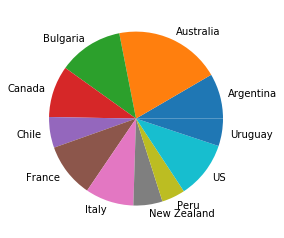

In [27]:
a = plt.pie(df_Malbec.iloc[:,1], labels = df_Malbec.iloc[:,0])